In [8]:
# setup
import sys
assert sys.version_info >= (3, 5)

import sklearn 
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize= 14)
mpl.rc("xtick", labelsize= 12)
mpl.rc("ytick", labelsize= 12)

# where to save
PROJECT_ROOT_DIR = "C:\\Users\\nathan-mekuria\\Desktop\\MachineLearning\\Codes\\Book_Hands_on_ml"
CHAPTER_ID = "decision_trees"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok= True)

def save_fig(fig_id, tight_layout= True, fig_extension= "png", resolution= 300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("saved", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format= fig_extension, dpi= resolution)

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # Petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth= 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

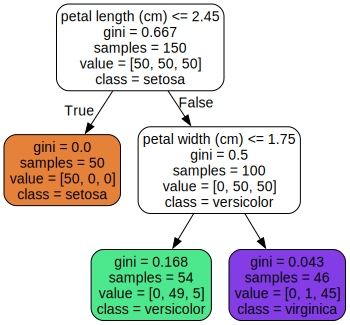

In [10]:
# visualization
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file= os.path.join(IMAGE_PATH, "iris_tree.dot"),
    feature_names= iris.feature_names[2: ],
    class_names = iris.target_names,
    rounded= True,
    filled= True

)

Source.from_file(os.path.join(IMAGE_PATH, "iris_tree.dot"))

saved decision_tree_decision_boundaries_plot


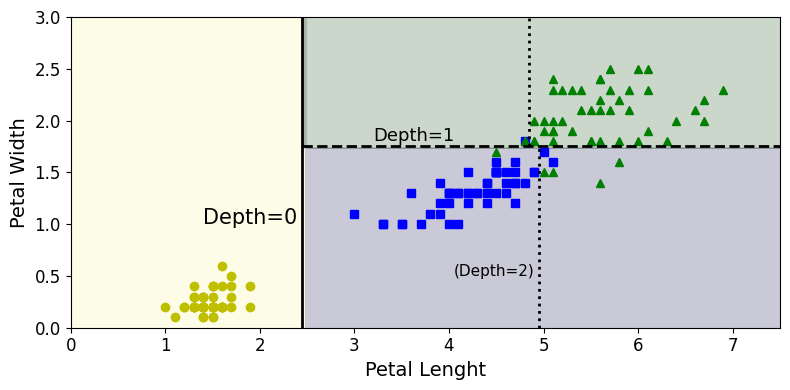

In [15]:
# making predictions
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes= [0, 7.5, 0, 3], iris= True, legends= False, plot_training= True):
    x1s= np.linspace(axes[0], axes[1], 100)
    x2s= np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#4c4c7f", "#507d50"])
    plt.contourf(x1, x2, y_pred, cmap= custom_cmap, alpha= 0.3)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d85', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap= custom_cmap2, alpha= 0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label= "Iris Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label= "Iris Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label= "Iris Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal Lenght", fontsize= 14)
        plt.ylabel("Petal Width", fontsize= 14)
    else:
        plt.xlabel(r"$x_1$", fontsize= 18)
        plt.ylabel(r"$x_2$", fontsize= 18, rotation= 0)
    if legends:
        plt.legend(loc= "lower right", fontsize= 14)

plt.figure(figsize= (8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [17]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5, 1.5]])

array([1])

saved min_samples_leaf_plots


[]

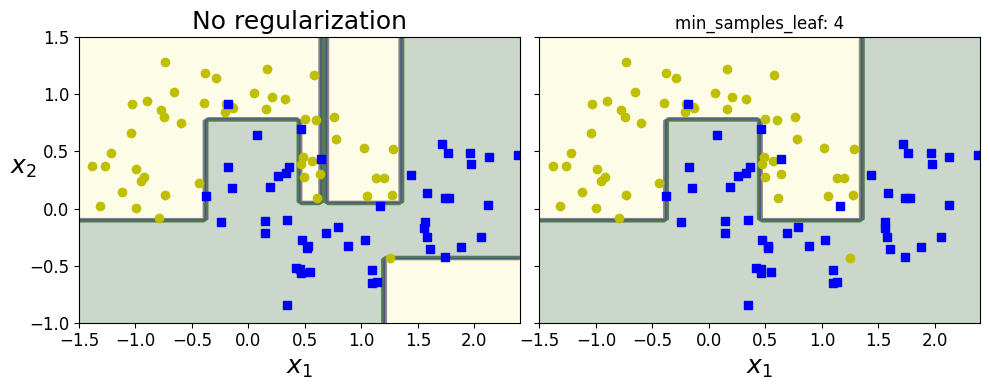

In [20]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples= 100, noise= 0.25, random_state= 53)
deep_tree_clf1 = DecisionTreeClassifier(random_state= 42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf= 4)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols= 2, figsize= (10, 4), sharey= True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes= [-1.5, 2.4, -1, 1.5], iris= False)
plt.title("No regularization", fontsize= 18)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes= [-1.5, 2.4, -1, 1.5], iris= False)
plt.title("min_samples_leaf: {}".format(deep_tree_clf2.min_samples_leaf))
plt.ylabel("")

save_fig("min_samples_leaf_plots")
plt.plot()


In [21]:
# Regression
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m - 1) / 10

C:\Users\nathan-mekuria\AppData\Local\Temp\ipykernel_21652\3818911968.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # rebusting
C:\Users\nathan-mekuria\AppData\Local\Temp\ipykernel_21652\3818911968.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # rebusting
C:\Users\nathan-mekuria\AppData\Local\Temp\ipykernel_21652\745077275.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


saved tree_regression_plot


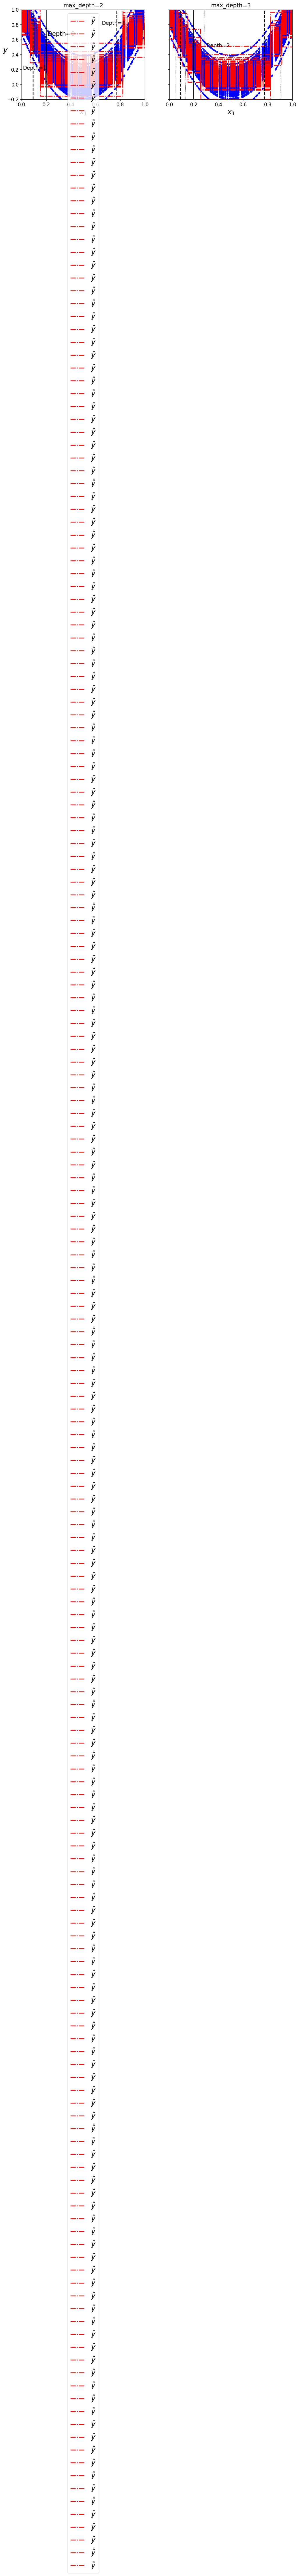

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth= 2, random_state= 42)
tree_reg2 = DecisionTreeRegressor(max_depth= 3, random_state= 42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_prediction(tree_reg, X, y, axes= [0, 1, -0.2, 1], ylabel= "$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize= 18)
    if ylabel:
        plt.ylabel(ylabel, fontsize= 18, rotation= 0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r-.", linewidth= 2, label= r"$\hat{y}$")

fig, axes = plt.subplots(ncols= 2, figsize= (12, 4), sharey= True, constrained_layout= True)
plt.sca(axes[0])
plot_regression_prediction(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth= 2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_prediction(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.tight_layout() # rebusting 


save_fig("tree_regression_plot")

plt.show()